# Hue, saturation and value manipulations

This code provides functions and examples on how to modify various color properties of images, including hue, saturation and brightness.  

First, let's import the required functions and libraries that we are going to use in the code. 

In [1]:
import os

import numpy as np 
import cv2

from HSV_manipulations import get_HSV_RGB, rotate_hue, change_saturation, plot_colorwheel    
from utils import print_image, imshow

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


We define the path of the image to modify and the path of the directory where we will save the results.

In [2]:
img_dir = "/Users/ombretta/Documents/Code/ansodataset/datasetlocal/" # Image directory
img_file = "adnan-coker_unknown-title(3).jpg" # Image file to modify
# img_file = "ad-reinhardt_yellow-painting-1949.jpg"
results_dir = "results/image_recoloring/examples/" # Where to save the altered images
os.makedirs(results_dir, exist_ok=True) # Creates results_dir if it does not exist

Let's visualize the original image and its pixel distribution across the color wheel (illustrated below).

![alt text](figures/color_wheel.jpeg "Title")

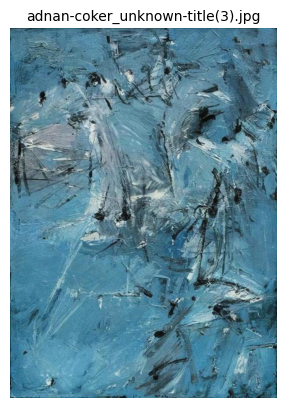

In [3]:
""" Here we read and plot the original image that we wish to modify."""
bgr_img = cv2.imread(img_dir + img_file) # cv2 encodes images in BGR
rgb_img = bgr_img[:, :, ::-1] # Converts BGR to RGB
imshow(rgb_img, img_file)

/Users/ombretta/Documents/Code/ansodataset/datasetlocal/adnan-coker_unknown-title(3).jpg


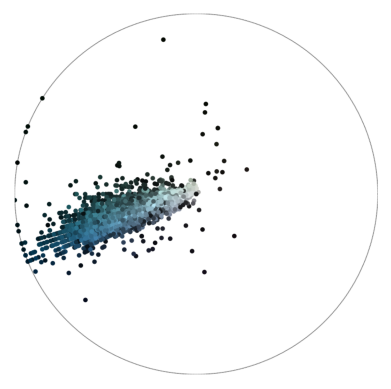

In [4]:
""" Here we plot its pixel distribution on the color wheel."""
hsv_img, rgb_img = get_HSV_RGB(img_dir + img_file, scale_factor=1)

# Downsample pixels for efficiency
downsampling_factor = 10
hsv_downsampled = hsv_img.transpose(2, 0, 1).reshape((3, -1)).transpose(1, 0)[::downsampling_factor]

# Define the colors on the color wheel
colors = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR).reshape(-1, 3)[::downsampling_factor][:, ::-1]

theta = hsv_downsampled[:, 0].astype('float16') * 2 * np.pi / 180.0  # Convert hue to radians
r = hsv_downsampled[:, 1]  # Saturation as radius
x_coordinates = r * np.cos(theta)
y_coordinates = r * np.sin(theta)

plot_colorwheel(x_coordinates, y_coordinates, colors, path=results_dir + "colorwheel.png")

colorwheel = cv2.imread(results_dir + "colorwheel.png")[:, :, ::-1]
imshow(colorwheel)

Let's modify the hue of the image by rotating all pixels across the colorwheel by a certain degree. The resulting image is saved in "result_dir".

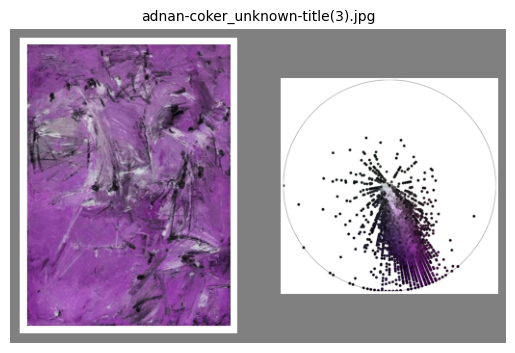

In [8]:
degrees = 90
result_dir = "results/image_recoloring/examples/"
rotate_hue(hsv_img.copy(), degrees, 1, img_file, result_dir)
modified_image_file = img_file.replace(".jpg", f"_{degrees}degrees_colorwheel.png")
img = cv2.imread(result_dir + modified_image_file)[:, :, ::-1] 
imshow(img, img_file)